# Hackathon idea 610
## Personalizing the BlackRock client experience - A quantitative approach to sales
Create a self-verifying dynamic database and model for tagging and reaching clients through attributes and focus topics most relevant to them. We’ll use this to model client behavior and understand the most effective way to engagement with them. •	Build a decision tree/scoring system associated with materials that match to (potential) clients by relevance •	Create client "prototypes" and group into "theme buckets" to improve relevance of communication •	Engage clients proactively through appropriate product-use segments This all works as a feedback system that helps us continuously readjust weights and improves the accuracy of our client data and the model. The overarching goal of this client engagement model is to drive further personalization of the iShares/BlackRock client experience. This will minimize unsuccessful marketing touches, exposure new business opportunities, create a more efficient sales process, and grow the share of iShares/BlackRock products in client portfolios.
## Structure at hand
We postpone the talk about the scope and the integration as an application of the idea to a later point in this presentation and start of with the basic framework of the modell itself. For demonstrative purposes we structured the model with only the key calculations taking place and the outcome that ought to be generated. So the demonstration follows a two-parts division with one part being the calibration of the modell, part two the application of the calibrated modell on a specific sales cycle.
## Part 1: Calibration

In [1]:
from IPython.display import display

In [2]:
#Step 1 consists of loading the dataset and combining them into one data 
#frame as origin for our analysis model.

import pandas as pd
import matplotlib.pyplot as plt

filename = 'hackathon2018_testdata.xlsx'

observations_wb = pd.ExcelFile(filename)

#The Activities and the Contact details are arranged in different sheets.
#Therefore, the individual sheets must be merged together, so the details 
#about the client are attributed to the corresponding activity.

observations = pd.merge(observations_wb.parse(1), 
                        observations_wb.parse(0), 
                        how='left', 
                        on='Client ID')


display(observations.head(10))

,Activity ID,Client ID,Activity Theme,Activity Type,Date,Activity Count,Lead Signal,Decision,Success,Name,Firm,Firm ID,Type,Size,Investable Assets ($b),Success (has previously invested)
0,291,10,Financial Instruments,Event,2016-03-01,7,2016-02-29,2016-03-03,0,Tonya Taylor,Yale,7,Endowment,250,1,1
1,358,19,Financial Instruments,Sales Call,2017-09-09,8,2017-04-09,2017-10-29,1,Kevin Green,Metlife,5,Insurance,100,10,1
2,620,4,Financial Instruments,Sales Meeting,2017-02-20,13,2017-02-15,2017-03-27,0,Jane Thomas,AGI,1,Asset Manager,7500,250,1
3,79,9,Fixed Income,Sales Call,2016-08-15,9,2016-06-25,2016-10-01,0,Gary Williams,Calpers,3,Public Pension,2500,50,0
4,577,25,Core,Event,2015-10-26,16,2015-05-07,2016-09-13,0,Matt Jackson,Calpers,3,Public Pension,2500,50,0
5,874,13,ESG,Sales Call,2017-07-26,11,2017-07-06,2017-08-26,1,Dale Moore,Goldman Sachs,0,Asset Manager,10000,500,0
6,6,0,Core,Sales Email,2015-10-13,11,2015-09-30,2015-10-13,0,John Smith,Harvard,6,Endowment,500,5,0
7,57,6,ESG,Sales Meeting,2016-06-21,12,2015-06-07,2017-04-06,1,Mary Page,Calpers,3,Public Pension,2500,50,0
8,18,24,ESG,Sales Email,2016-01-26,13,2015-11-22,2016-03-06,1,Martin Ward,Yale,7,Endowment,250,1,1
9,437,20,Financial Instruments,Sales Email,2017-03-03,18,2016-12-05,2017-05-18,0,Jay Evan,AGI,1,Asset Manager,7500,250,1


We transform every variable into a numeric value, categoricals are replaced by dummies.

In [3]:
#Step 2 is to prepare the data for mathematical transformation. Which 
#means at this point to convert all non numerical information to dummy
#variables.

observations['Days since lead'] = observations['Date'] - observations['Lead Signal']

observations['Time till decision'] = observations['Decision'] - observations['Lead Signal']

observations = observations.set_index(['Firm ID', 
                                       'Client ID', 
                                       'Activity ID', 
                                       'Days since lead']).sort_index().drop(['Date', 
                                                                              'Lead Signal', 
                                                                              'Decision', 
                                                                              'Name', 
                                                                              'Firm'], 
                                                                             axis=1)

observations = observations.join(pd.get_dummies(observations[['Activity Theme', 
                                                              'Activity Type', 
                                                              'Type']])).drop(['Activity Theme', 
                                                                               'Activity Type', 
                                                                               'Type'], 
                                                                             axis=1)

#Transform the Activity Count into a variable measuring only the amount of
#interaction that has taken place until day t_0 instead of all interaction 
#for one sales cycle

observations['Activity Count'] = observations.groupby('Activity ID').cumcount() + 1 

display(observations.head(10))

Activity Count  Success   Size  \
Firm ID Client ID Activity ID Days since lead                                   
0       1         7           1 days                        1        0  10000   
                              5 days                        2        0  10000   
                              50 days                       3        0  10000   
                              66 days                       4        0  10000   
                              68 days                       5        0  10000   
                              83 days                       6        0  10000   
                              103 days                      7        0  10000   
                              141 days                      8        0  10000   
                  8           7 days                        1        1  10000   
                              9 days                        2        1  10000   

                                               Investable Assets ($b)  \
Firm ID Client ID Activity ID Days since lead                           
0       1         7           1 days                              500   
                              5 days                              500   
                              50 days                             500   
                              66 days                             500   
                              68 days                             500   
                              83 days                             500   
                              103 days                            500   
                              141 days                            500   
                  8           7 days                              500   
                              9 days                              500   

                                               Success (has previously invested)  \
Firm ID Client ID Activity ID Days since lead                                      
0       1         7           1 days                                           0   
                              5 days                                           0   
                              50 days                                          0   
                              66 days                                          0   
                              68 days                                          0   
                              83 days                                          0   
                              103 days                                         0   
                              141 days                                         0   
                  8           7 days                                           0   
                              9 days                                           0   

                                              Time till decision  \
Firm ID Client ID Activity ID Days since lead                      
0       1         7           1 days                    141 days   
                              5 days                    141 days   
                              50 days                   141 days   
                              66 days                   141 days   
                              68 days                   141 days   
                              83 days                   141 days   
                              103 days                  141 days   
                              141 days                  141 days   
                  8           7 days                     33 days   
                              9 days                     33 days   

                                               Activity Theme_Core  \
Firm ID Client ID Activity ID Days since lead                        
0       1         7           1 days                             0   
                              5 days                             0   
                              50 days                            0   
                     

Now that our Dataframe has the desired shape and properties, it is time to calibrate the model. First, let's analyse the results that our regression analysis would yield on one example profile. We take an individual client contact here, assuming that individual behavior remains largely consistent over time for one specific character.

In [4]:
#Fitting logarithmic regression model on success of failure of sales cycle.

import statsmodels.api as sm
from pandas.core import datetools

#The following two lines of code are necesary in order to produce correct
#summary statistics. The code for statsmodels ist deprecated and has not 
#yet been fixed. 

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

observations = observations.reset_index(level=['Firm ID',
                                               'Client ID',
                                               'Activity ID',
                                               'Days since lead'])

#For some general insights in how the model works on our data set, 
#we pick one static profile (in this case an individual, namely Mike Jones) 
#and analyse how each communication through different channels within the 
#sales cycle has affected the outcome. The code breaks as soon as we 
#deplete of sufficient observations per Activity Count.

sample_client = observations[observations['Client ID'] == 1].groupby('Activity Count')

for group, activity_count in sample_client:
    print('Activity Count: ' + str(group))
    x = activity_count[['Activity Type_Marketing Email', 
                        'Activity Type_Sales Call',
                        'Activity Type_Sales Email', 
                        'Activity Type_Sales Meeting',
                        'Activity Type_Webcast']]
    y = activity_count['Success']
    try:
        logit_model = sm.Logit(y,x)
        result = logit_model.fit()
    except:
        break
    display(result.summary())

/usr/local/Anaconda3-5.0.1-Linux-x86_64/envs/jupyter-atp/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Activity Count: 1
         Current function value: 0.638514
         Iterations: 35


/usr/local/Anaconda3-5.0.1-Linux-x86_64/envs/jupyter-atp/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   37
Model:                          Logit   Df Residuals:                       32
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                 0.06648
Time:                        10:56:05   Log-Likelihood:                -23.625
converged:                      False   LL-Null:                       -25.308
                                        LLR p-value:                    0.4987
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email   -22.8914   9.35e+04     -0.000      1.000   -1.83e+05    1.83e+05
Activity Type_Sales Call         -0.9163      0.837     -1.095      0.273      -2.556       0.724
Activity Type_Sales Email         0.6931      0.866      0.800      0.423      -1.004       2.391
Activity Type_Sales Meeting      -0.5108      0.730     -0.699      0.484      -1.942       0.921
Activity Type_Webcast            -0.2877      0.764     -0.377      0.706      -1.785       1.209
=================================================================================================
"""

Activity Count: 2
Optimization terminated successfully.
         Current function value: 0.657917
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   37
Model:                          Logit   Df Residuals:                       32
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                 0.03812
Time:                        10:56:05   Log-Likelihood:                -24.343
converged:                       True   LL-Null:                       -25.308
                                        LLR p-value:                    0.7488
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email    -0.6931      0.866     -0.800      0.423      -2.391       1.004
Activity Type_Sales Call               0      0.816          0      1.000      -1.600       1.600
Activity Type_Sales Email              0      0.816          0      1.000      -1.600       1.600
Activity Type_Sales Meeting      -1.3863      1.118     -1.240      0.215      -3.578       0.805
Activity Type_Webcast                  0      0.816          0      1.000      -1.600       1.600
=================================================================================================
"""

Activity Count: 3
Optimization terminated successfully.
         Current function value: 0.679738
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   37
Model:                          Logit   Df Residuals:                       32
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                0.006214
Time:                        10:56:05   Log-Likelihood:                -25.150
converged:                       True   LL-Null:                       -25.308
                                        LLR p-value:                    0.9889
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email          0      0.707          0      1.000      -1.386       1.386
Activity Type_Sales Call         -0.4055      0.913     -0.444      0.657      -2.195       1.384
Activity Type_Sales Email        -0.6931      0.866     -0.800      0.423      -2.391       1.004
Activity Type_Sales Meeting      -0.2231      0.671     -0.333      0.739      -1.538       1.092
Activity Type_Webcast                  0      1.414          0      1.000      -2.772       2.772
=================================================================================================
"""

Activity Count: 4
         Current function value: 0.636946
         Iterations: 35


/usr/local/Anaconda3-5.0.1-Linux-x86_64/envs/jupyter-atp/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   37
Model:                          Logit   Df Residuals:                       32
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                 0.06878
Time:                        10:56:06   Log-Likelihood:                -23.567
converged:                      False   LL-Null:                       -25.308
                                        LLR p-value:                    0.4808
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email    -0.4055      0.913     -0.444      0.657      -2.195       1.384
Activity Type_Sales Call         -0.6931      0.866     -0.800      0.423      -2.391       1.004
Activity Type_Sales Email         0.5108      0.730      0.699      0.484      -0.921       1.942
Activity Type_Sales Meeting            0      0.816          0      1.000      -1.600       1.600
Activity Type_Webcast           -22.8052   6.33e+04     -0.000      1.000   -1.24e+05    1.24e+05
=================================================================================================
"""

Activity Count: 5
Optimization terminated successfully.
         Current function value: 0.649011
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   34
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                 0.04204
Time:                        10:56:06   Log-Likelihood:                -22.066
converged:                       True   LL-Null:                       -23.035
                                        LLR p-value:                    0.7474
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email     0.6931      1.225      0.566      0.571      -1.707       3.094
Activity Type_Sales Call         -0.2877      0.764     -0.377      0.706      -1.785       1.209
Activity Type_Sales Email        -1.0986      1.155     -0.951      0.341      -3.362       1.165
Activity Type_Sales Meeting       0.2877      0.764      0.377      0.706      -1.209       1.785
Activity Type_Webcast            -0.9163      0.837     -1.095      0.273      -2.556       0.724
=================================================================================================
"""

Activity Count: 6
Optimization terminated successfully.
         Current function value: 0.616996
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   34
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                 0.08930
Time:                        10:56:06   Log-Likelihood:                -20.978
converged:                       True   LL-Null:                       -23.035
                                        LLR p-value:                    0.3908
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email    -0.6931      1.225     -0.566      0.571      -3.094       1.707
Activity Type_Sales Call         -1.6094      1.095     -1.469      0.142      -3.756       0.538
Activity Type_Sales Email              0      0.816          0      1.000      -1.600       1.600
Activity Type_Sales Meeting      -1.3863      1.118     -1.240      0.215      -3.578       0.805
Activity Type_Webcast                  0      0.816          0      1.000      -1.600       1.600
=================================================================================================
"""

Activity Count: 7
         Current function value: 0.582044
         Iterations: 35


/usr/local/Anaconda3-5.0.1-Linux-x86_64/envs/jupyter-atp/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   32
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                  0.1383
Time:                        10:56:06   Log-Likelihood:                -18.625
converged:                      False   LL-Null:                       -21.615
                                        LLR p-value:                    0.2007
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email   -19.6698   1.08e+04     -0.002      0.999   -2.12e+04    2.11e+04
Activity Type_Sales Call          0.4055      0.913      0.444      0.657      -1.384       2.195
Activity Type_Sales Email         0.6931      0.866      0.800      0.423      -1.004       2.391
Activity Type_Sales Meeting      -0.2877      0.764     -0.377      0.706      -1.785       1.209
Activity Type_Webcast            -1.3863      1.118     -1.240      0.215      -3.578       0.805
=================================================================================================
"""

Activity Count: 8
Optimization terminated successfully.
         Current function value: 0.633595
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   30
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                 0.07400
Time:                        10:56:06   Log-Likelihood:                -19.008
converged:                       True   LL-Null:                       -20.527
                                        LLR p-value:                    0.5515
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email     0.4055      0.913      0.444      0.657      -1.384       2.195
Activity Type_Sales Call         -0.6931      0.866     -0.800      0.423      -2.391       1.004
Activity Type_Sales Email        -0.8473      0.690     -1.228      0.220      -2.200       0.505
Activity Type_Sales Meeting      -1.0986      1.155     -0.951      0.341      -3.362       1.165
Activity Type_Webcast                  0      1.414          0      1.000      -2.772       2.772
=================================================================================================
"""

Activity Count: 9
         Current function value: 0.488145
         Iterations: 35


/usr/local/Anaconda3-5.0.1-Linux-x86_64/envs/jupyter-atp/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   25
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                  0.2747
Time:                        10:56:06   Log-Likelihood:                -12.204
converged:                      False   LL-Null:                       -16.825
                                        LLR p-value:                   0.05530
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email    -0.4055      0.913     -0.444      0.657      -2.195       1.384
Activity Type_Sales Call        -22.8429   4.08e+04     -0.001      1.000      -8e+04       8e+04
Activity Type_Sales Email        -0.2877      0.764     -0.377      0.706      -1.785       1.209
Activity Type_Sales Meeting      -0.4055      0.913     -0.444      0.657      -2.195       1.384
Activity Type_Webcast            17.6336   4770.478      0.004      0.997   -9332.332    9367.599
=================================================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Activity Count: 10
         Current function value: 0.441123
         Iterations: 35


/usr/local/Anaconda3-5.0.1-Linux-x86_64/envs/jupyter-atp/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   21
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                  0.3362
Time:                        10:56:06   Log-Likelihood:                -9.2636
converged:                      False   LL-Null:                       -13.955
                                        LLR p-value:                   0.05221
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email     0.6931      0.866      0.800      0.423      -1.004       2.391
Activity Type_Sales Call        -25.8747    2.4e+05     -0.000      1.000    -4.7e+05     4.7e+05
Activity Type_Sales Email         1.0986      1.155      0.951      0.341      -1.165       3.362
Activity Type_Sales Meeting      -1.3863      1.118     -1.240      0.215      -3.578       0.805
Activity Type_Webcast           -42.6048   1.26e+09  -3.38e-08      1.000   -2.47e+09    2.47e+09
=================================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Activity Count: 11


/usr/local/Anaconda3-5.0.1-Linux-x86_64/envs/jupyter-atp/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.415888
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   15
Model:                          Logit   Df Residuals:                       10
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                  0.3820
Time:                        10:56:06   Log-Likelihood:                -6.2383
converged:                      False   LL-Null:                       -10.095
                                        LLR p-value:                    0.1026
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email    19.8949   1.48e+04      0.001      0.999   -2.89e+04     2.9e+04
Activity Type_Sales Call               0      1.414          0      1.000      -2.772       2.772
Activity Type_Sales Email      -157.7282   1.78e+34  -8.86e-33      1.000   -3.49e+34    3.49e+34
Activity Type_Sales Meeting     -22.8429   5.27e+04     -0.000      1.000   -1.03e+05    1.03e+05
Activity Type_Webcast                  0      1.414          0      1.000      -2.772       2.772
=================================================================================================

Possibly complete quasi-separation: A fraction 0.40 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Activity Count: 12
         Current function value: 0.339382
         Iterations: 35


/usr/local/Anaconda3-5.0.1-Linux-x86_64/envs/jupyter-atp/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   14
Model:                          Logit   Df Residuals:                        9
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                  0.5030
Time:                        10:56:06   Log-Likelihood:                -4.7514
converged:                      False   LL-Null:                       -9.5607
                                        LLR p-value:                   0.04736
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email    22.6826   8.42e+04      0.000      1.000   -1.65e+05    1.65e+05
Activity Type_Sales Call         25.8747   2.94e+05   8.81e-05      1.000   -5.76e+05    5.76e+05
Activity Type_Sales Email       -22.6898   8.45e+04     -0.000      1.000   -1.66e+05    1.66e+05
Activity Type_Sales Meeting     -22.8213   5.21e+04     -0.000      1.000   -1.02e+05    1.02e+05
Activity Type_Webcast            -0.4055      0.913     -0.444      0.657      -2.195       1.384
=================================================================================================

Possibly complete quasi-separation: A fraction 0.50 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Activity Count: 13


/usr/local/Anaconda3-5.0.1-Linux-x86_64/envs/jupyter-atp/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.252054
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   11
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Apr 2018   Pseudo R-squ.:                  0.6342
Time:                        10:56:06   Log-Likelihood:                -2.7726
converged:                      False   LL-Null:                       -7.5791
                                        LLR p-value:                   0.04748
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Activity Type_Marketing Email    34.3298   2.74e+07   1.25e-06      1.000   -5.37e+07    5.37e+07
Activity Type_Sales Call         34.3298   2.74e+07   1.25e-06      1.000   -5.37e+07    5.37e+07
Activity Type_Sales Email       -34.3303   2.85e+07   -1.2e-06      1.000   -5.58e+07    5.58e+07
Activity Type_Sales Meeting     -42.6266   1.04e+09  -4.09e-08      1.000   -2.04e+09    2.04e+09
Activity Type_Webcast            34.3298   2.74e+07   1.25e-06      1.000   -5.37e+07    5.37e+07
=================================================================================================

Possibly complete quasi-separation: A fraction 0.64 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Activity Count: 14
         Current function value: 0.198042
         Iterations: 35


We see that the larger the coefficient is, the stronger is also it's variance rendering the additional information that is added at this point insignificant (s. p > |z|). Many times the Estimator is not even converging to a Maximum. This is probably a result of the decreasing numbers on observations that are available for this Activity Count as we approach the final decision date. It would be surprising anyway, though not impossible, if we would come across significant patterns within randomised data. 
At this point, one could well imagine testing a broad array of features on their influence on the success rate of the sales cycle. Conveniently, the sklearn.feature_selection module employs a tool RFE ("Recursive Feature Elimination") to test the parameters on their performance and eliminate those with little information value. This helps to navigate through a vast collection of potential information and reduce the risk of overfitting the model. 

/usr/local/Anaconda3-5.0.1-Linux-x86_64/envs/jupyter-atp/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


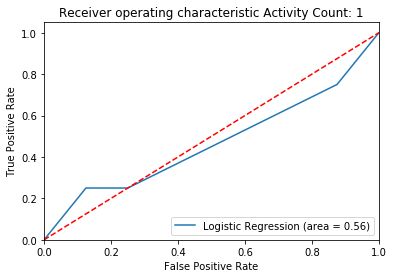

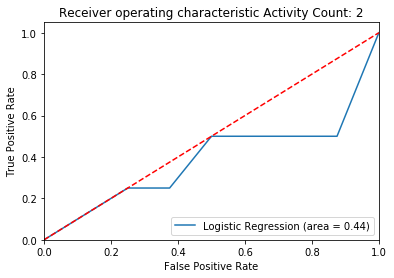

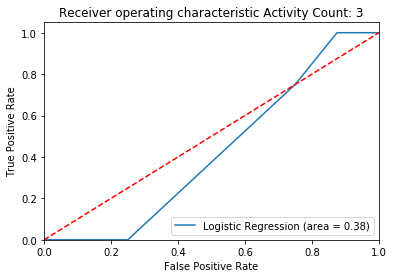

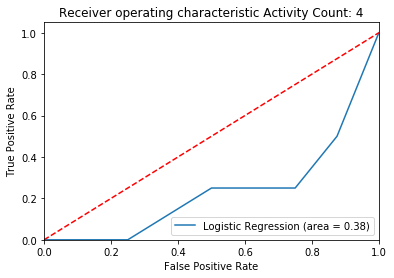

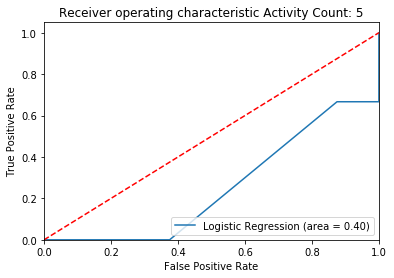

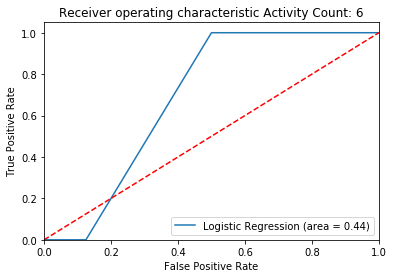

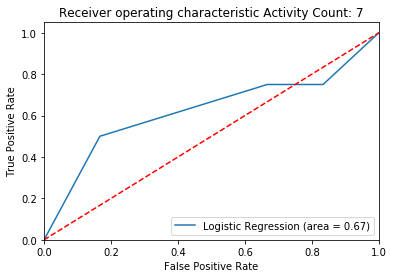

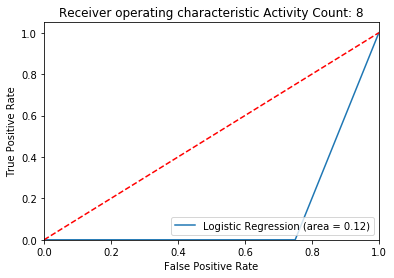

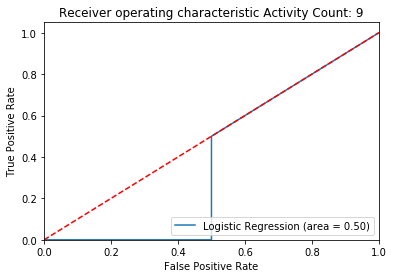

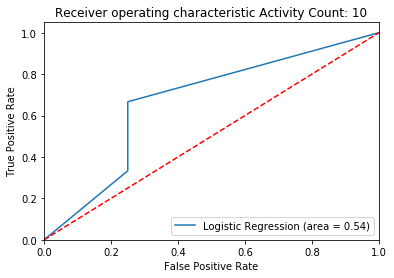

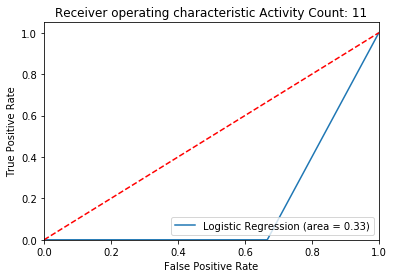

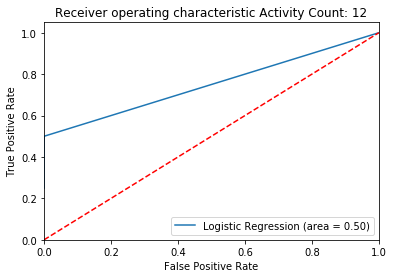

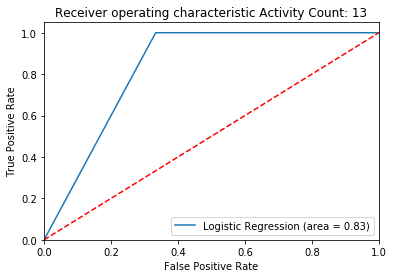

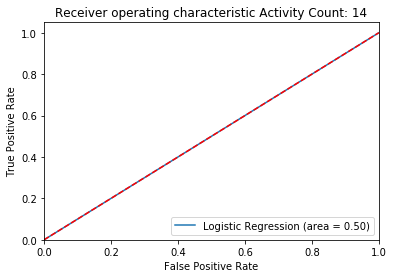

In [5]:
#Let's train our model at last.

import sklearn.linear_model as skl
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.cross_validation import train_test_split

LogReg = skl.LogisticRegression()

#Again for illustrative purposes we select one client only: Mike Jones

sample_client_Mike = observations[observations['Client ID'] == 1].groupby('Activity Count')

fitted_models_Mike = {}

for group, activity_count in sample_client_Mike:
    x = activity_count[['Activity Type_Event',
                        'Activity Type_Marketing Email', 
                        'Activity Type_Sales Call',
                        'Activity Type_Sales Email', 
                        'Activity Type_Sales Meeting',
                        'Activity Type_Webcast']]
    y = activity_count['Success']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    try:
        fitted_models_Mike['Activity Count' + str(group)] = LogReg.fit(x_train, 
                                                                  y_train)
    except:
        break
    logit_roc_auc = roc_auc_score(y_test, LogReg.predict(x_test))
    fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Activity Count: ' + str(group))
    plt.legend(loc="lower right")
    plt.show()

As one can see from the ROC curves, our current predictors are not very informative yet. The dotted red line indicates a purely random classifier. A better classifier remains in the top-left area.

In [6]:
sample_client_John = observations[observations['Client ID'] == 0].groupby('Activity Count')

fitted_models_John = {}

for group, activity_count in sample_client_John:
    x = activity_count[['Activity Type_Event',
                        'Activity Type_Marketing Email', 
                        'Activity Type_Sales Call',
                        'Activity Type_Sales Email', 
                        'Activity Type_Sales Meeting',
                        'Activity Type_Webcast']]
    y = activity_count['Success']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    try:
        fitted_models_John['Activity Count' + str(group)] = LogReg.fit(x_train, 
                                                                       y_train)
    except:
        break

        
        
sample_client_Steve = observations[observations['Client ID'] == 2].groupby('Activity Count')

fitted_models_Steve = {}

for group, activity_count in sample_client_Steve:
    x = activity_count[['Activity Type_Event',
                        'Activity Type_Marketing Email', 
                        'Activity Type_Sales Call',
                        'Activity Type_Sales Email', 
                        'Activity Type_Sales Meeting',
                        'Activity Type_Webcast']]
    y = activity_count['Success']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    try:
        fitted_models_Steve['Activity Count' + str(group)] = LogReg.fit(x_train, y_train)
    except:
        break

## Part 2: Application

In [7]:
filename = 'hackathon2018_testdata_v2.xlsx'

test_wb = pd.ExcelFile(filename)

test = pd.merge(test_wb.parse(1), 
                test_wb.parse(0), 
                how='left', 
                on='Client ID')

test = test.set_index(['Firm ID', 'Client ID', 'Activity ID', 'Date']).sort_index()

test = test.join(pd.get_dummies(test[['Activity Type']])).drop(['Activity Theme', 'Activity Type', 'Type'], axis=1)

test = test.reset_index(level=['Firm ID', 'Client ID', 'Activity ID', 'Date'])

test['Activity Count'] = test.groupby('Activity ID').cumcount() + 1 

test = test[['Activity ID', 'Client ID', 'Activity Count', 'Success', 'Activity Type_Event', 'Activity Type_Marketing Email', 'Activity Type_Sales Call', 'Activity Type_Sales Email', 'Activity Type_Sales Meeting', 'Activity Type_Webcast']]

test_John = test[test['Client ID'] == 0]
test_Mike = test[test['Client ID'] == 1]
test_Steve = test[test['Client ID'] == 2]

display(test_John.head(10))

,Activity ID,Client ID,Activity Count,Success,Activity Type_Event,Activity Type_Marketing Email,Activity Type_Sales Call,Activity Type_Sales Email,Activity Type_Sales Meeting,Activity Type_Webcast
99,25.0,0.0,1,1.0,1,0,0,0,0,0
100,25.0,0.0,2,1.0,0,0,0,0,1,0
101,25.0,0.0,3,1.0,0,0,1,0,0,0
102,25.0,0.0,4,1.0,0,0,0,1,0,0
103,25.0,0.0,5,1.0,0,0,1,0,0,0
109,25.0,0.0,6,1.0,0,1,0,0,0,0


In [36]:
predictions_John = {}
predictions_Mike = {}
predictions_Steve = {}

for count in test_John['Activity Count']:
    x = test_John.iloc[[count - 1],4:10]
    try:
        predictions_John[count] = fitted_models_John['Activity Count' + str(count)].predict_proba(x).item(1)
    except:
        break
        
for count in test_Mike['Activity Count']:
    x = test_Mike.iloc[[count - 1],4:10]
    try:
        predictions_Mike[count] = fitted_models_Mike['Activity Count' + str(count)].predict_proba(x).item(1)
    except:
        break
        
for count in test_Steve['Activity Count']:
    x = test_Steve.iloc[[count - 1],4:10]
    try:
        predictions_Steve[count] = fitted_models_Steve['Activity Count' + str(count)].predict_proba(x).item(1)
    except:
        break

predictions_John = pd.DataFrame.from_dict(predictions_John, orient='index')
predictions_Mike = pd.DataFrame.from_dict(predictions_Mike, orient='index')
predictions_Steve = pd.DataFrame.from_dict(predictions_Steve, orient='index')

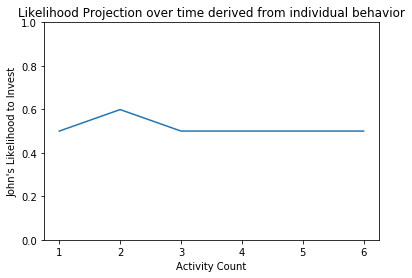

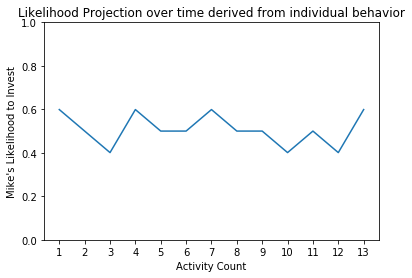

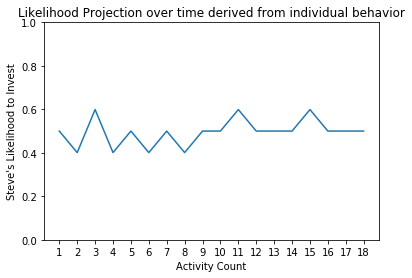

In [43]:
plt.plot(predictions_John)
plt.ylim([0.0, 1.0])
plt.xticks(predictions_John.index)
plt.xlabel('Activity Count')
plt.ylabel('John\'s Likelihood to Invest')
plt.title('Likelihood Projection over time derived from individual behavior')
plt.show()

plt.plot(predictions_Mike)
plt.ylim([0.0, 1.0])
plt.xticks(predictions_Mike.index)
plt.xlabel('Activity Count')
plt.ylabel('Mike\'s Likelihood to Invest')
plt.title('Likelihood Projection over time derived from individual behavior')
plt.show()

plt.plot(predictions_Steve)
plt.ylim([0.0, 1.0])
plt.xticks(predictions_Steve.index)
plt.xlabel('Activity Count')
plt.ylabel('Steve\'s Likelihood to Invest')
plt.title('Likelihood Projection over time derived from individual behavior')
plt.show()